# test the normalization routines for dNdz and winKappa

In [1]:
import crosspower as cp
#import FisherCl as fcl
import FisherCl2 as fcl
from numpy.linalg import eigh

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

In [2]:
# reload any changes that have been made to crosspower.py
reload(cp)
reload(fcl.cp)
#reload(fcl)

<module 'crosspower' from 'crosspower.pyc'>

In [3]:
# get matter power object
myPk = cp.matterPower()

zs.size:  998


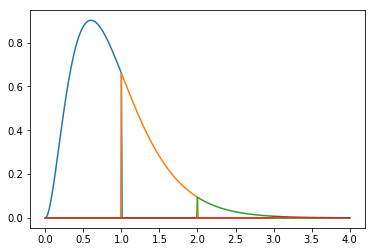

In [4]:
# look at dndz
# this plot uses getDNDZinterp
zmax = 4.0
nBins = 4 #16
z0 = 0.3 #1.5
cp.plotModelDNDZbins(z0=z0,zmax=zmax,nBins=nBins)

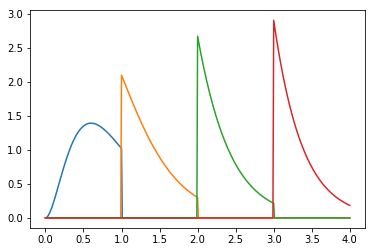

In [5]:
# this plot uses getNormalizedDNDZbin
cp.plotModelDNDZbins(z0=z0,zmax=zmax,nBins=nBins,doNorm=True)

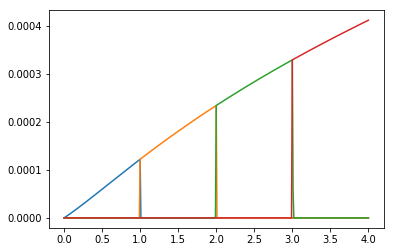

In [6]:
# look at lensing window function, normalized in bins
# this plot uses getWinKinterp
cp.plotWinKbins(myPk,zmax=zmax,nBins=nBins)

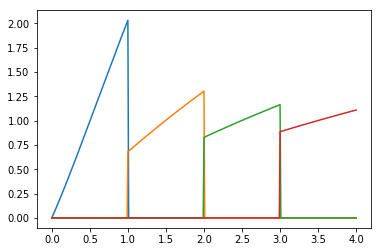

In [7]:
# this plot uses getNormalizedWinKbin
cp.plotWinKbins(myPk,zmax=zmax,nBins=nBins,doNorm=True)

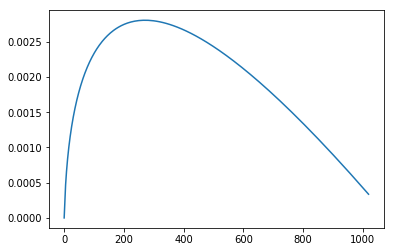

In [8]:
# look at non-normalized version
zs = myPk.zs
winKarray = cp.winKappa(myPk)
plt.plot(zs,winKarray);

(0, 0.0005)

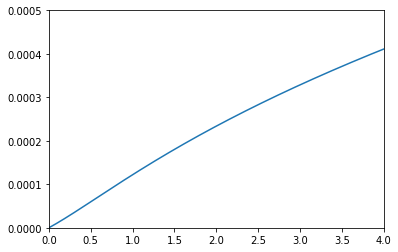

In [9]:
plt.plot(zs,winKarray)
plt.xlim([0,4])
plt.ylim([0,0.0005])

normFac:      0.0185194435554
normFacQ:     0.0185185185185
direct calc:  0.0185185185185
0.333349983997
0.333333333333


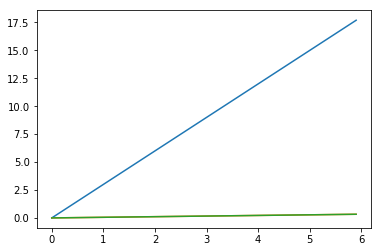

In [10]:
# Check normBin
# use a line through origin; area under it will be of a triangle
myFofZ = lambda z: 3*z
zDomain = np.arange(0,6,1./10)
# get normFac
normFac  = cp.normBin(myFofZ,0,6,zDomain,1000)
normFacQ = cp.normBinQuad(myFofZ,0,6)
myResult = myFofZ(zDomain)

# check normFac value
print 'normFac:     ',normFac
print 'normFacQ:    ',normFacQ
print 'direct calc: ',1/(3*6*6*.5) # 1/triangle area
print myFofZ(6)*normFac
print myFofZ(6)*normFacQ

plt.plot(zDomain,myResult)
plt.plot(zDomain,myResult*normFac)
plt.plot(zDomain,myResult*normFacQ);

binEdges:  [ 0.  1.  2.  3.  4.  5.  6.]
bin edges:  0.0 1.0
normFac:   0.666733273387
normFacQ:  0.666666666667 

bin edges:  1.0 2.0
normFac:   0.222229622476
normFacQ:  0.222222222222 

bin edges:  2.0 3.0
normFac:   0.133335997389
normFacQ:  0.133333333333 

bin edges:  3.0 4.0
normFac:   0.0952394544425
normFacQ:  0.0952380952381 

bin edges:  4.0 5.0
normFac:   0.0740748963062
normFacQ:  0.0740740740741 

bin edges:  5.0 6.0
normFac:   0.06061321672
normFacQ:  0.0606060606061 



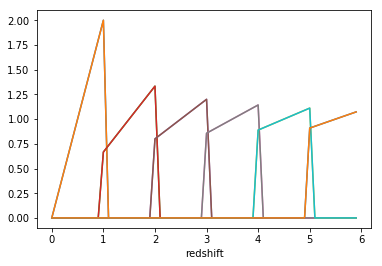

In [14]:
# check using more than 1 bin
reload(cp)
nBins = 6
zmax = 6
normPoints = 1000
verbose = False
binEdges = np.linspace(0,zmax,nBins+1) # +1 for fenceposts 
print 'binEdges: ',binEdges
for binNum in range(nBins):
    print 'bin edges: ',binEdges[binNum],binEdges[binNum+1]
    normFac  = cp.normBin(myFofZ,binEdges[binNum],binEdges[binNum+1],zDomain,normPoints, verbose=verbose)
    normFacQ = cp.normBinQuad(myFofZ,binEdges[binNum],binEdges[binNum+1])
    print 'normFac:  ',normFac
    print 'normFacQ: ',normFacQ, '\n'
    FRange = myFofZ(zDomain)
    FRange[np.where(zDomain < binEdges[binNum])]   = 0
    FRange[np.where(zDomain > binEdges[binNum+1])] = 0
    plt.plot(zDomain,FRange*normFac)
    plt.plot(zDomain,FRange*normFacQ)
plt.xlabel('redshift');

In [12]:
# looks like that did it!  Now on to seeing if that fixes things...

# Check the effect of raising the $\ell_{min}$ value for $F_{ij} = \Sigma_\ell (...)$

In [13]:
# Create a Fisher Matrix object
reload(fcl.cp)
reload(fcl)
zmax = 4
nBins = 4
AccuracyBoost=3
Fobj = fcl.FisherMatrix(zmax=zmax,nBins=nBins,AccuracyBoost=AccuracyBoost)
print 'binAs: ',Fobj.binAs
print 'binBs: ',Fobj.binBs

creating matter power spectrum object...
zs.size:  998


creating more matter power objects...
creating matter power spectra for  ombh2  derivative...
zs.size:  998


zs.size:  998


creating matter power spectra for  omch2  derivative...
zs.size:  998


KeyboardInterrupt: 

In [99]:
# save it

import pickle
#filehandler = open('Fisher_4_4.obj','w')  # first save: omch2+omnu2 fixed; but this result is flawed
#filehandler = open('Fisher_4_4b.obj','w') # second save: not fixed
#filehandler = open('Fisher_4_4c.obj','w') # third save: omch2+omnu2 fixed again
    # needed to re-do first case because getCl was erroneously only using kappa, no galaxies
filehandler = open('Fisher_4_4d.obj','w') # third save: omch2+omnu2 fixed again
    # this time using AccuracyBoost=3 for power spectra


#filehandler2 = open('Fisher_4_4_myPk.obj','w')
# ditch the myPk part since pickle can't handle classes within a class
myPkTemp = Fobj.myPk
Fobj.myPk = 0
pickle.dump(Fobj,filehandler)
filehandler.close()

#pickle.dump(myPkTemp,filehandler2)
# put it back
Fobj.myPk = myPkTemp
print 'done'


done


In [100]:
"""# code to re-open it
import FisherCl2 as fcl
import pickle
filehandler2 = open('Fisher_4_4.obj', 'r') 
Fobj2 = pickle.load(filehandler2) 
"""

"# code to re-open it\nimport FisherCl2 as fcl\nimport pickle\nfilehandler2 = open('Fisher_4_4.obj', 'r') \nFobj2 = pickle.load(filehandler2) \n"

In [101]:
print Fobj.obsList
print Fobj.paramList

[  0.   1.   2.   3.   4.   6.   7.   8.   9.  12.  13.  14.  18.  19.  24.]
['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'bin1', 'bin2', 'bin3', 'bin4']


In [102]:
sigmas = Fobj.getSigmas()
for i,p in enumerate(Fobj.paramList):
    print p, sigmas[i]

ombh2 0.000465953140081
omch2 0.00110396937431
cosmomc_theta 1.57497192248e-05
As 2.46789402614e-11
ns 0.00332346166468
tau 2.80425448584
mnu 0.0171215933033
bin1 0.0182618714202
bin2 0.0254253099527
bin3 0.0343990021423
bin4 0.0432267732913


In [103]:
# make comparison against version with higher lmin
# copy some code from FisherMatrix.__init__

def makeFisher(Fobj,lmin):
    """ code copied from FisherMatrix.__init__
        Inputs:
            Fobj:
            lmin: minimum ell to make Fij
    """
    #Build Fisher matrix
    #multply vectorT,invcov,vector and add up
    print 'building Fisher matrix from components...'
    print 'invCov.shape: ',Fobj.invCov.shape,', dClVecs.shape: ',Fobj.dClVecs.shape
    nParams = Fobj.nParams
    lmax = 2000 #Fobj.lmax
    Fij = np.zeros((nParams,nParams)) # indices match those in paramList
    for i in range(nParams):
      print 'starting bin set ',i+1,' of ',nParams
      dClVec_i = Fobj.dClVecs[:,i,:] # shape (nCls,nElls)
      for j in range(nParams):
        dClVec_j = Fobj.dClVecs[:,j,:] # shape (nCls,nElls)
        # ugh.  don't like nested loops in Python... but easier to program...
        for ell in range(lmin-2,lmax-1): #-2 to match the indices
          myCov = Fobj.invCov[:,:,ell]
          fij = np.dot(dClVec_i[:,ell],np.dot(myCov,dClVec_j[:,ell]))
          
          Fij[i,j] += fij
    
    print 'creation of Fisher Matrix complete!\n'
    return Fij

In [104]:
# check to see if result is the same with lmin = 2
Fij = makeFisher(Fobj,lmin=2)

building Fisher matrix from components...
invCov.shape:  (15, 15, 1999) , dClVecs.shape:  (15, 11, 1999)
starting bin set  1  of  11
starting bin set  2  of  11
starting bin set  3  of  11
starting bin set  4  of  11
starting bin set  5  of  11
starting bin set  6  of  11
starting bin set  7  of  11
starting bin set  8  of  11
starting bin set  9  of  11
starting bin set  10  of  11
starting bin set  11  of  11
creation of Fisher Matrix complete!



In [105]:
sigmas2 = np.sqrt(np.diag(np.linalg.inv(Fij)))
print 'comparing two sets of sigmas:'
for i,p in enumerate(Fobj.paramList):
    print p, sigmas[i], sigmas2[i]

comparing two sets of sigmas:
ombh2 0.000465953140081 0.000465953140081
omch2 0.00110396937431 0.00110396937431
cosmomc_theta 1.57497192248e-05 1.57497192248e-05
As 2.46789402614e-11 2.46789402614e-11
ns 0.00332346166468 0.00332346166468
tau 2.80425448584 2.80425448584
mnu 0.0171215933033 0.0171215933033
bin1 0.0182618714202 0.0182618714202
bin2 0.0254253099527 0.0254253099527
bin3 0.0343990021423 0.0343990021423
bin4 0.0432267732913 0.0432267732913


In [106]:
# check to see if result is the same with lmin = 10,20
Fij10 = makeFisher(Fobj,lmin=10)
Fij20 = makeFisher(Fobj,lmin=20)
sigmas10 = np.sqrt(np.diag(np.linalg.inv(Fij10)))
sigmas20 = np.sqrt(np.diag(np.linalg.inv(Fij20)))
print 'comparing four sets of sigmas for lmin = 2,2,10,20:'
for i,p in enumerate(Fobj.paramList):
    print p, sigmas[i], sigmas2[i], sigmas10[i], sigmas20[i]

building Fisher matrix from components...
invCov.shape:  (15, 15, 1999) , dClVecs.shape:  (15, 11, 1999)
starting bin set  1  of  11
starting bin set  2  of  11
starting bin set  3  of  11
starting bin set  4  of  11
starting bin set  5  of  11
starting bin set  6  of  11
starting bin set  7  of  11
starting bin set  8  of  11
starting bin set  9  of  11
starting bin set  10  of  11
starting bin set  11  of  11
creation of Fisher Matrix complete!

building Fisher matrix from components...
invCov.shape:  (15, 15, 1999) , dClVecs.shape:  (15, 11, 1999)
starting bin set  1  of  11
starting bin set  2  of  11
starting bin set  3  of  11
starting bin set  4  of  11
starting bin set  5  of  11
starting bin set  6  of  11
starting bin set  7  of  11
starting bin set  8  of  11
starting bin set  9  of  11
starting bin set  10  of  11
starting bin set  11  of  11
creation of Fisher Matrix complete!

comparing four sets of sigmas for lmin = 2,2,10,20:
ombh2 0.000465953140081 0.000465953140081 0.

In [107]:
# check to see if result is the same with lmin = 50,100
Fij50 = makeFisher(Fobj,lmin=50)
Fij100 = makeFisher(Fobj,lmin=100)
sigmas50 = np.sqrt(np.diag(np.linalg.inv(Fij50)))
sigmas100 = np.sqrt(np.diag(np.linalg.inv(Fij100)))
print 'comparing four sets of sigmas for lmin = 2,10,50,100:'
for i,p in enumerate(Fobj.paramList):
    print p, sigmas[i], sigmas10[i], sigmas50[i], sigmas100[i]

building Fisher matrix from components...
invCov.shape:  (15, 15, 1999) , dClVecs.shape:  (15, 11, 1999)
starting bin set  1  of  11
starting bin set  2  of  11
starting bin set  3  of  11
starting bin set  4  of  11
starting bin set  5  of  11
starting bin set  6  of  11
starting bin set  7  of  11
starting bin set  8  of  11
starting bin set  9  of  11
starting bin set  10  of  11
starting bin set  11  of  11
creation of Fisher Matrix complete!

building Fisher matrix from components...
invCov.shape:  (15, 15, 1999) , dClVecs.shape:  (15, 11, 1999)
starting bin set  1  of  11
starting bin set  2  of  11
starting bin set  3  of  11
starting bin set  4  of  11
starting bin set  5  of  11
starting bin set  6  of  11
starting bin set  7  of  11
starting bin set  8  of  11
starting bin set  9  of  11
starting bin set  10  of  11
starting bin set  11  of  11
creation of Fisher Matrix complete!

comparing four sets of sigmas for lmin = 2,10,50,100:
ombh2 0.000465953140081 0.000466026047107 

In [108]:
# check to see if result is the same with lmin = 200,500
Fij200 = makeFisher(Fobj,lmin=200)
Fij500 = makeFisher(Fobj,lmin=500)
sigmas200 = np.sqrt(np.diag(np.linalg.inv(Fij200)))
sigmas500 = np.sqrt(np.diag(np.linalg.inv(Fij500)))
print 'comparing four sets of sigmas for lmin = 2,10,20,100,200,500:'
for i,p in enumerate(Fobj.paramList):
    print p, sigmas[i], sigmas10[i], sigmas20[i], sigmas100[i], sigmas200[i], sigmas500[i]

building Fisher matrix from components...
invCov.shape:  (15, 15, 1999) , dClVecs.shape:  (15, 11, 1999)
starting bin set  1  of  11
starting bin set  2  of  11
starting bin set  3  of  11
starting bin set  4  of  11
starting bin set  5  of  11
starting bin set  6  of  11
starting bin set  7  of  11
starting bin set  8  of  11
starting bin set  9  of  11
starting bin set  10  of  11
starting bin set  11  of  11
creation of Fisher Matrix complete!

building Fisher matrix from components...
invCov.shape:  (15, 15, 1999) , dClVecs.shape:  (15, 11, 1999)
starting bin set  1  of  11
starting bin set  2  of  11
starting bin set  3  of  11
starting bin set  4  of  11
starting bin set  5  of  11
starting bin set  6  of  11
starting bin set  7  of  11
starting bin set  8  of  11
starting bin set  9  of  11
starting bin set  10  of  11
starting bin set  11  of  11
creation of Fisher Matrix complete!

comparing four sets of sigmas for lmin = 2,10,20,100,200,500:
ombh2 0.000465953140081 0.00046602

In [109]:
print 'comparing four sets of sigmas for lmin = 2,10,100,500:'
for i,p in enumerate(Fobj.paramList):
    print p, sigmas[i], sigmas10[i], sigmas100[i], sigmas500[i]

comparing four sets of sigmas for lmin = 2,10,100,500:
ombh2 0.000465953140081 0.000466026047107 0.000474976110896 0.000571592137998
omch2 0.00110396937431 0.00110468803985 0.00111542763173 0.00140994026375
cosmomc_theta 1.57497192248e-05 1.57661093644e-05 1.59522425846e-05 1.86769669933e-05
As 2.46789402614e-11 2.46864141301e-11 2.59491338984e-11 3.6799273808e-11
ns 0.00332346166468 0.00332865897469 0.0034571167481 0.00420191929752
tau 2.80425448584 2.80763089669 2.88953303214 3.6552083217
mnu 0.0171215933033 0.0171496814838 0.0183327645195 0.0226335763764
bin1 0.0182618714202 0.01826878678 0.0183928533656 0.0223216806618
bin2 0.0254253099527 0.0254351621089 0.0255876341834 0.0313808935691
bin3 0.0343990021423 0.0344137846651 0.0346386763646 0.0427317865367
bin4 0.0432267732913 0.043245674545 0.0435336631932 0.0538464641969


In [110]:
print 'comparing ratios sets of sigmas for lmin = 10/2, 100/2, 500/2:'
for i,p in enumerate(Fobj.paramList):
    print p, sigmas10[i]/sigmas[i], sigmas100[i]/sigmas[i], sigmas500[i]/sigmas[i]

comparing ratios sets of sigmas for lmin = 10/2, 100/2, 500/2:
ombh2 1.00015646858 1.01936454557 1.22671592663
omch2 1.00065098322 1.01037914428 1.27715523325
cosmomc_theta 1.00104066233 1.01285885525 1.18586031451
As 1.00030284399 1.05146872692 1.49112050268
ns 1.00156382427 1.04021562362 1.26432007391
tau 1.00120403154 1.03041041629 1.30345100281
mnu 1.00164051207 1.07073939877 1.32193166696
bin1 1.0003786775 1.00717242732 1.2223106903
bin2 1.00038749404 1.00638435602 1.23423838795
bin3 1.00042973696 1.00696747601 1.24223913124
bin4 1.00043725803 1.00709953296 1.24567392144


# Get ready some comparisons with Byeonghee's code.
First throw out the $\tau$ row and column from each Matrix, since he is not using $\tau$

In [111]:
paramList = Fobj.paramList
print paramList
# use various lmin values: 
# Fij (lmin 2)
# Fij10
# Fij50
# Fij100

['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'bin1', 'bin2', 'bin3', 'bin4']


In [112]:
# verify how the delete function works
arr = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
toDelete = 1
print arr
arr2 = np.delete(arr,toDelete,0)
print arr2
arr3 = np.delete(arr2,toDelete,1)
print arr3

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[ 1  2  3  4]
 [ 9 10 11 12]]
[[ 1  3  4]
 [ 9 11 12]]


In [113]:
# define row,col deleting function
def fixParam(Fij,pNum):
    return np.delete(np.delete(Fij,pNum,0),pNum,1)

In [114]:
# remove tau: row,column = 5
toDelete = 5
paramListB = np.delete(paramList,toDelete)
Fij2b = fixParam(Fij,toDelete)
Fij10b = fixParam(Fij10,toDelete)
Fij50b = fixParam(Fij50,toDelete)
Fij100b = fixParam(Fij100,toDelete)
print paramList
print paramListB
print Fij2b.shape

['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'bin1', 'bin2', 'bin3', 'bin4']
['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns' 'mnu' 'bin1' 'bin2' 'bin3'
 'bin4']
(10, 10)


In [115]:
def getSigmas(Fij,paramList,lmin):
    """ report Fij and return sigmas """
    np.set_printoptions(precision=3)
    sigmas = np.sqrt(np.diag(np.linalg.inv(Fij)))
    print 'Fij with lmin = ',lmin,': '
    print Fij
    print 'one sigma error forecasts:'
    for i,p in enumerate(paramList):
        print p, sigmas[i]
    print '\n'
    return sigmas

In [116]:
sigmas2b = getSigmas(Fij2b,paramListB,2)
sigmas10b = getSigmas(Fij10b,paramListB,10)
sigmas50b = getSigmas(Fij50b,paramListB,50)
sigmas100b = getSigmas(Fij100b,paramListB,100)

Fij with lmin =  2 : 
[[  9.131e+09  -2.780e+09   4.766e+10  -1.641e+17  -3.062e+08   1.523e+08
   -1.007e+08  -5.813e+07  -3.817e+07  -2.841e+07]
 [ -2.780e+09   1.337e+09  -1.749e+10   5.674e+16   1.084e+08  -5.497e+07
    3.828e+07   1.496e+07   6.406e+06   3.508e+06]
 [  4.766e+10  -1.749e+10   4.276e+11  -8.085e+17  -1.609e+09   7.433e+08
   -1.051e+09  -2.431e+08  -5.621e+07  -5.006e+06]
 [ -1.641e+17   5.674e+16  -8.085e+17   3.119e+24   5.647e+15  -2.934e+15
    1.687e+15   1.024e+15   6.724e+14   5.046e+14]
 [ -3.062e+08   1.084e+08  -1.609e+09   5.647e+15   1.154e+07  -5.352e+06
    3.285e+06   1.722e+06   1.171e+06   9.384e+05]
 [  1.523e+08  -5.497e+07   7.433e+08  -2.934e+15  -5.352e+06   2.779e+06
   -1.543e+06  -9.312e+05  -6.214e+05  -4.576e+05]
 [ -1.007e+08   3.828e+07  -1.051e+09   1.687e+15   3.285e+06  -1.543e+06
    3.118e+06   1.334e-11  -1.492e-11   1.274e-11]
 [ -5.813e+07   1.496e+07  -2.431e+08   1.024e+15   1.722e+06  -9.312e+05
    2.013e-12   1.527e+06   4